<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/LR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LINEAR REGRESSION**

Train-Test Split Evaluation

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

**Train Dataset:** Used to fit the machine learning model.

**Test Dataset**: Used to evaluate the fit machine learning model.

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [ ]:
car = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/ToyotaCorolla.csv')

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [ ]:
car.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961,0.409471,0.895543,3.815460,0.81337,0.970752,0.722841,0.508357,0.056407,0.294568,0.218663,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.002786,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,0.0,0.188510,41.128611,52.64112,0.491907,0.305959,3.011025,0.38975,0.168559,0.447751,0.500104,0.230786,0.456007,0.413483,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.052723,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000,0.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000,1.000000,1.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
car.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0


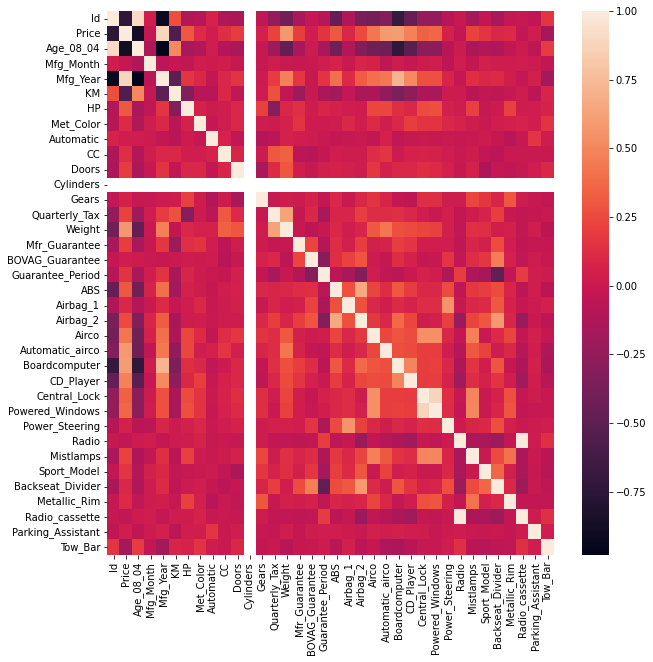

In [ ]:
correlation_matrix = car.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data=correlation_matrix,ax=ax)

In [ ]:
car.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,-0.130207,NaN,-0.043343,-0.240821,-0.414500,-0.162006,-0.015065,-0.086256,-0.461437,-0.123465,-0.358316,-0.386207,-0.327468,-0.695207,-0.464520,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,-0.049103,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,NaN,0.063104,0.219197,0.581198,0.197802,0.028133,0.146627,0.306138,0.093588,0.248974,0.429259,0.588262,0.601292,0.481374,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,0.044375,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.198431,-0.470253,-0.164658,0.006865,-0.152563,-0.412887,-0.105406,-0.329017,-0.403600,-0.426259,-0.719449,-0.510895,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,-0.048172,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,NaN,-0.013063,0.031373,-0.002167,-0.005771,-0.003863,0.029010,0.072532,0.003756,0.076749,0.057088,-0.049017,0.017715,-0.016736,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,0.007113,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,NaN,0.007766,0.193934,0.473478,0.166697,-0.006206,0.148218,0.402215,0.105359,0.317075,0.395674,0.437718,0.720567,0.517008,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,0.047171,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,NaN,0.015023,0.278165,-0.028598,-0.212851,0.001438,-0.138942,-0.177203,-0.018012,-0.139275,-0.133057,-0.258221,-0.353862,-0.266826,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,-0.064318,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,NaN,0.209477,-0.298432,0.089614,0.140026,0.022701,0.076163,0.057832,0.025137,0.017644,0.241134,0.244957,0.129715,0.102300,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.029990,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,NaN,0.018601,0.011326,0.057929,0.154850,0.010783,0.009295,0.022298,0.100055,0.038416,0.114190,0.027977,0.089886,0.198220,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.036691,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,NaN,-0.098555,-0.055371,0.057249,0.026194,0.023393,-0.002256,-0.016128,-0.011895,0.001171,-0.028353,0.059057,-0.037069,-0.010967,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.159985,0.018786
CC,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,NaN,0.014629,0.306996,0.335637,-0.057407,-0.081725,-0.017683,0.037806,0.022678,0.024738,0.119888,0.162669,0.009312,0.057787,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002883,0.002725


In [ ]:
car['Cylinders'].value_counts()

4    1436
Name: Cylinders, dtype: int64

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


y=car['Price']
X=car.drop(['Price'],axis=1)





In [ ]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)
#The size of the split can be specified via the “test_size” argument that takes a number
# of rows (integer) or a percentage (float) of the size of the dataset between 0 and 1.
#using random state with integer value, we get the same train and test size. 


In [ ]:
car_lm = LinearRegression()
car_lm.fit(X_train, y_train)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient':car_lm.coef_}))

        Predictor  coefficient
0              Id    -0.167668
1       Age_08_04   -86.259991
2       Mfg_Month   -65.405463
3        Mfg_Year    12.638695
4              KM    -0.016947
..            ...          ...
359     Color_Red   394.801519
360  Color_Silver   383.959237
361  Color_Violet  1651.806178
362   Color_White    42.150033
363  Color_Yellow   575.883665

[364 rows x 2 columns]


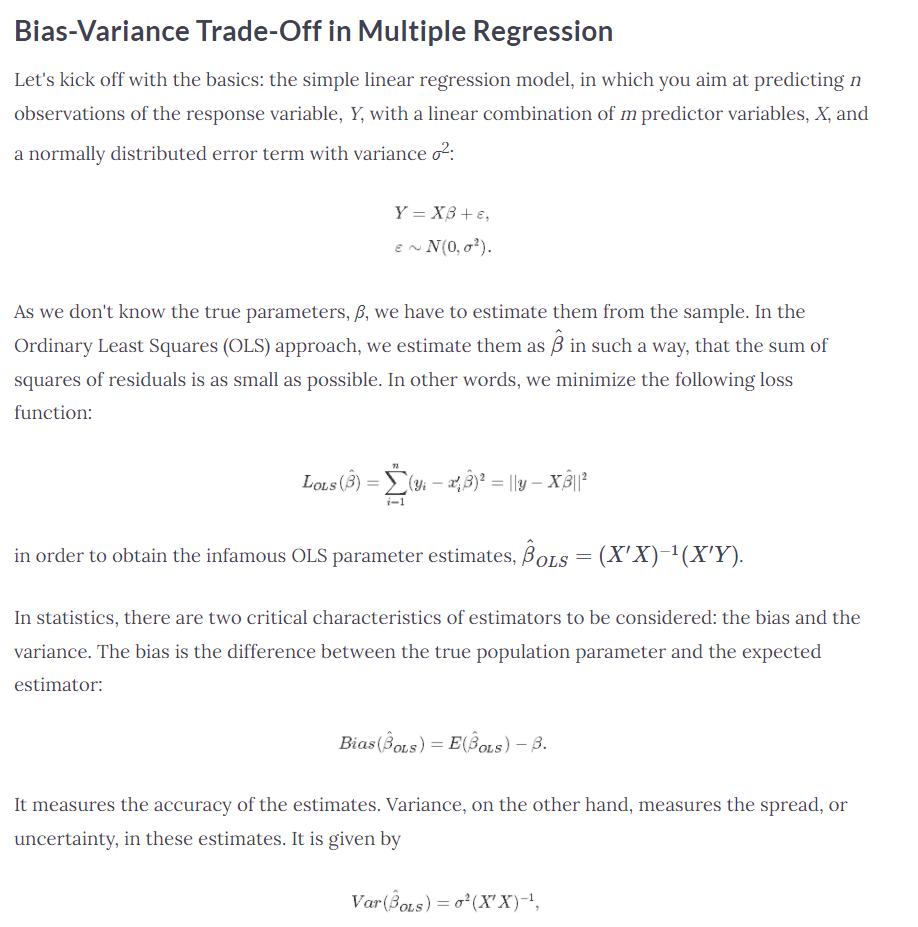

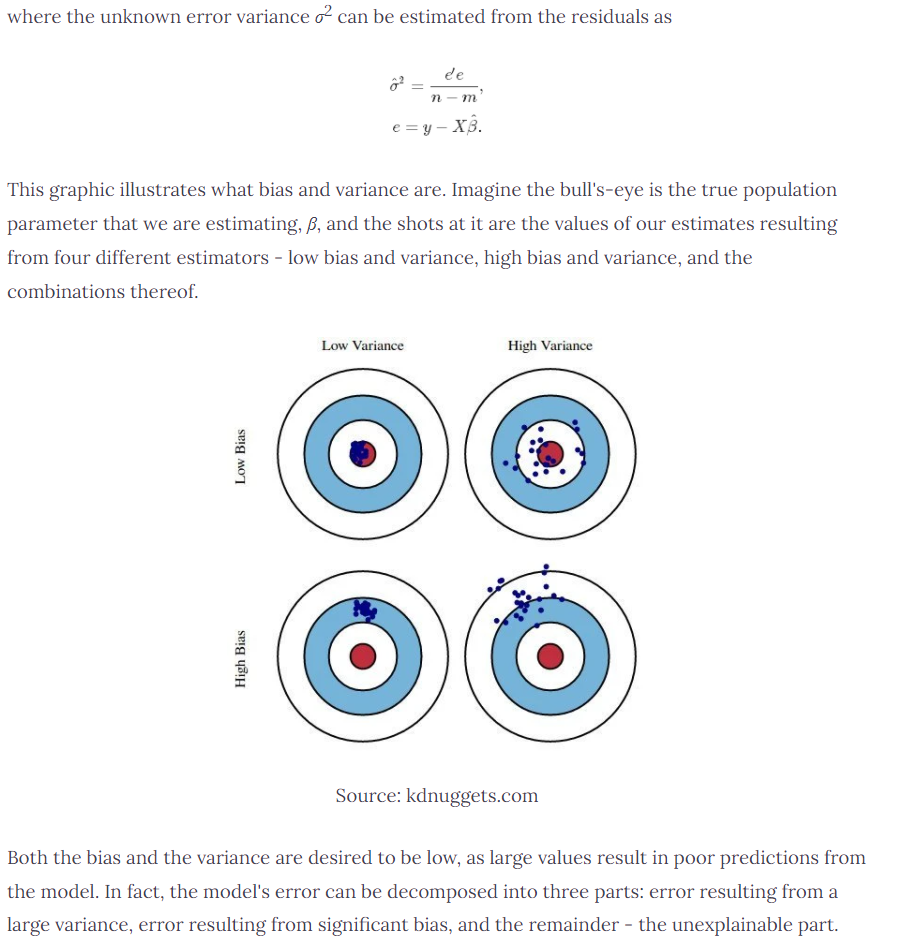

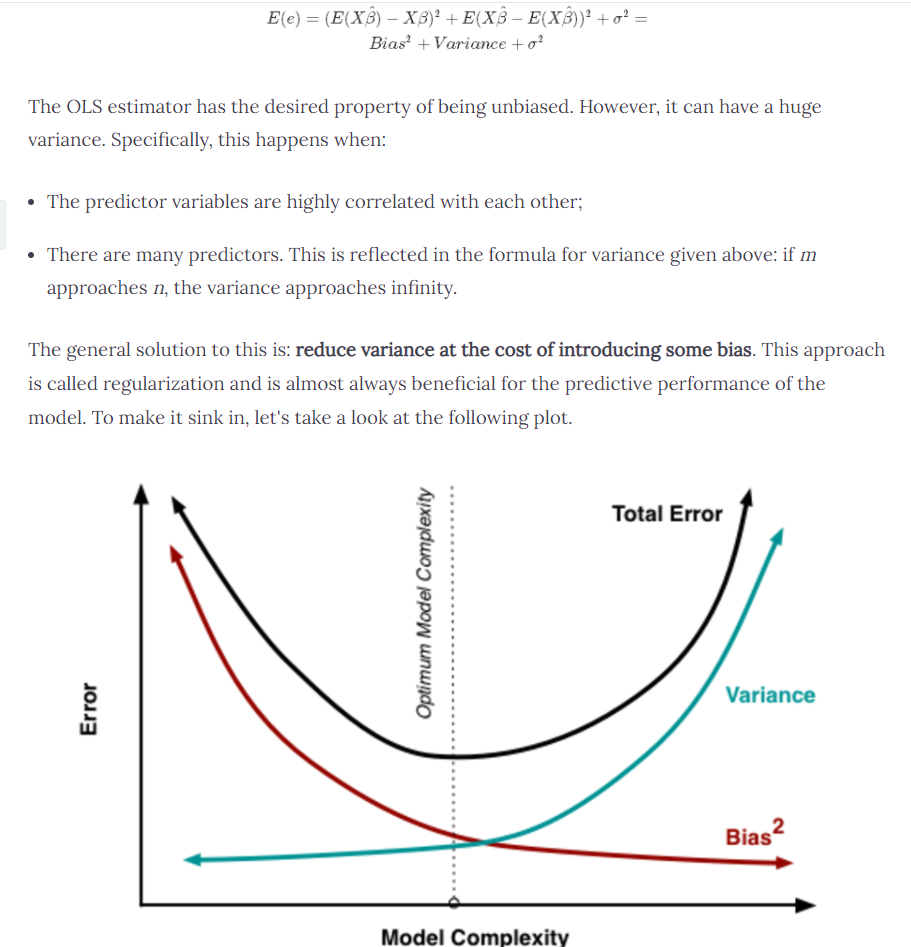

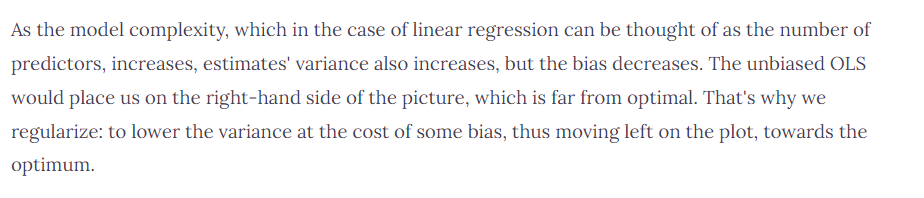

In [ ]:
print(sum(y_test))
MSE=mean_squared_error(y_test,car_lm.predict(X_test) ) 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

3010229
Root Mean Square Error:

2172.617900985471


LASSO REGRESSION

In [ ]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import math
ridge2 = Ridge()
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
#print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
MSE=mean_squared_error(y_test, pred2) 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1016.8795771334835


In [ ]:
lasso2 = Lasso()
lasso2.fit(X_train, y_train)             # Fit a lasso regression on the training data
#print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
MSE=mean_squared_error(y_test, lasso2.predict(X_test) ) 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

998.6735566587843


If your linear model contains many predictor variables or if these variables are correlated, the standard OLS parameter estimates have large variance, thus making the model unreliable.

To counter this, you can use regularization - a technique allowing to decrease this variance at the cost of introducing some bias. Finding a good bias-variance trade-off allows to minimize the model's total error.

There are three popular regularization techniques, each of them aiming at decreasing the size of the coefficients:

Ridge Regression, which penalizes sum of squared coefficients (L2 penalty).

Lasso Regression, which penalizes the sum of absolute values of the coefficients (L1 penalty).

Elastic Net, a convex combination of Ridge and Lasso.

